In [1]:
import os, glob, pickle
import numpy as np
import matplotlib.pyplot as plt

In [42]:
## make some job files
num_per_chunk = 1e7
nmc_zero_mass = 1e10
nmc_nonzero_mass = 1e8
num_reps_per_file = 100

iso_list = ["ar_37", "be_7", "v_49", "cr_51", "fe_55", "ge_68", "se_72"]

dsq_file = "/Users/dcmoore/grace/impulse/steriles/dsq_jobs.sh"
dsqf = open(dsq_file, 'wt')
dsqf.write("#!/bin/bash\n")

for iso in iso_list:

    mnu = 0
    job_file = "/Users/dcmoore/grace/impulse/steriles/job_files/%s_jobs.txt"%iso
    jf = open(job_file, 'wt')
    nchunks = int(nmc_zero_mass/(num_reps_per_file*num_per_chunk))
    print(nchunks)
    for i in range(nchunks):
        jf.write("module load miniconda; source activate; conda activate py37_dev; python calculate_pdfs.py %s %.1f %d %d\n"%(iso, mnu, num_reps_per_file, i))
    jf.close()

    # 100 reps and 1e7 per chunk is 1.5 gb and 15 minutes
    dsqf.write("dsq --job-file job_files/%s_jobs.txt --mem-per-cpu 4g -t 30:00 --mail-type NONE\n"%iso)

    ## now for non zero masses
    job_file = "/Users/dcmoore/grace/impulse/steriles/job_files/%s_nonzero_jobs.txt"%iso
    jf = open(job_file, 'wt')
    num_reps_per_file = int(nmc_nonzero_mass/num_per_chunk)
    iso_dat = np.loadtxt("/Users/dcmoore/grace/impulse/steriles/data_files/%s.txt"%iso, delimiter=',', skiprows=3)
    Q, t12, A = iso_dat[0, :]
    ## now as a function of sterile mass
    mass_list = np.linspace(1, Q, 100)
    nmasses_per_file = 5
    nchunks = int(len(mass_list)/nmasses_per_file)
    for i in range(nchunks):
        curr_masses = mass_list[(i*nmasses_per_file):((i+1)*nmasses_per_file)]
        curr_str = ["%.1f"%j for j in curr_masses]
        mnu = ','.join(curr_str)
        jf.write("module load miniconda; source activate; conda activate py37_dev; python calculate_pdfs.py %s %s %d %d\n"%(iso, mnu, num_reps_per_file, 0))
    jf.close()

    # 10 reps x 5 masses and 1e7 per chunk is 1.5 gb and 7.5 minutes
    dsqf.write("dsq --job-file job_files/%s_nonzero_jobs.txt --mem-per-cpu 4g -t 30:00 --mail-type NONE\n"%iso)

dsqf.close()

10
100
100
100
100
100
100


In [43]:
## collect and plot files from a given directory

data_dir = "/Users/dcmoore/grace/impulse/steriles/data_files/"
save_dir = "/Users/dcmoore/grace/impulse/steriles/pdfs/"
save_files = True

file_list = glob.glob(data_dir + "*.npz")

iso_list = []
## assumes file name starts with isotope in the form "el_A"
for f in file_list:
    cfile = os.path.split(f)[-1]
    fp = cfile.split('_')
    ciso = fp[0] + "_" + fp[1]
    if not ciso in iso_list:
        iso_list.append(ciso)

for iso in iso_list:

    curr_dict = {} ## dictionary to hold pdfs

    iso_files = glob.glob(data_dir + iso + "*.npz")

    ## make a list of the masses for that iso
    mnu_list = []
    for f in iso_files:
        cfile = os.path.split(f)[-1]
        fp = cfile.split('_')
        cmnu = fp[3]
        if not cmnu in mnu_list:
            mnu_list.append(cmnu)

    for mnu in mnu_list:

        curr_iso_files = glob.glob(data_dir + iso + "_mnu_" + mnu + "*.npz")
        nfiles = len(curr_iso_files)
        print("working on %d files for %s with mnu = %s: "%(nfiles, iso, mnu))

        for i in range(nfiles):
            pdf = np.load(curr_iso_files[i])
            
            if(i==0):
                p = pdf['pdf']
            else:
                p += pdf['pdf']

        x = pdf['x']

        cdf = np.cumsum(p)/np.sum(p)

        curr_dict[mnu] = np.vstack((x,p,cdf)).T

    if(save_files):
        of = open(save_dir + "%s_pdfs.pkl"%iso, "wb")
        pickle.dump(curr_dict, of)
        of.close()

Exception ignored in: <function NpzFile.__del__ at 0x1067b69d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/numpy/lib/npyio.py", line 224, in __del__
    self.close()
  File "/usr/local/lib/python3.9/site-packages/numpy/lib/npyio.py", line 219, in close
    self.fid.close()
OSError: [Errno 5] Input/output error


working on 10 files for ar_37 with mnu = 0.0: 
working on 1 files for ar_37 with mnu = 1.0: 
working on 1 files for ar_37 with mnu = 107.7: 
working on 1 files for ar_37 with mnu = 116.0: 
working on 1 files for ar_37 with mnu = 124.2: 
working on 1 files for ar_37 with mnu = 132.4: 
working on 1 files for ar_37 with mnu = 140.6: 
working on 1 files for ar_37 with mnu = 148.8: 
working on 1 files for ar_37 with mnu = 157.0: 
working on 1 files for ar_37 with mnu = 165.2: 
working on 1 files for ar_37 with mnu = 17.4: 
working on 1 files for ar_37 with mnu = 173.4: 
working on 1 files for ar_37 with mnu = 181.6: 
working on 1 files for ar_37 with mnu = 189.8: 
working on 1 files for ar_37 with mnu = 198.1: 
working on 1 files for ar_37 with mnu = 206.3: 
working on 1 files for ar_37 with mnu = 214.5: 
working on 1 files for ar_37 with mnu = 222.7: 
working on 1 files for ar_37 with mnu = 230.9: 
working on 1 files for ar_37 with mnu = 239.1: 
working on 1 files for ar_37 with mnu = 247.

/var/folders/sz/h29lm_2j53v8vmw0zm_6hxqm0000gn/T/ipykernel_8654/1879234313.py:49: RuntimeWarning: invalid value encountered in true_divide
  cdf = np.cumsum(p)/np.sum(p)


working on 1 files for ar_37 with mnu = 83.1: 
working on 1 files for ar_37 with mnu = 9.2: 
working on 1 files for ar_37 with mnu = 91.3: 
working on 1 files for ar_37 with mnu = 99.5: 
working on 100 files for be_7 with mnu = 0.0: 
working on 1 files for be_7 with mnu = 1.0: 
working on 1 files for be_7 with mnu = 101.6: 
working on 1 files for be_7 with mnu = 105.5: 
working on 1 files for be_7 with mnu = 109.4: 
working on 1 files for be_7 with mnu = 113.3: 
working on 1 files for be_7 with mnu = 117.1: 
working on 1 files for be_7 with mnu = 12.6: 
working on 1 files for be_7 with mnu = 121.0: 
working on 1 files for be_7 with mnu = 124.9: 
working on 1 files for be_7 with mnu = 128.7: 
working on 1 files for be_7 with mnu = 132.6: 
working on 1 files for be_7 with mnu = 136.5: 
working on 1 files for be_7 with mnu = 140.3: 
working on 1 files for be_7 with mnu = 144.2: 
working on 1 files for be_7 with mnu = 148.1: 
working on 1 files for be_7 with mnu = 152.0: 
working on 1 file

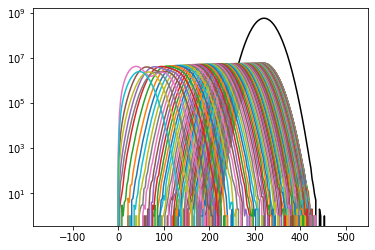

In [48]:
iso = 'se_72'

of = open(save_dir + '%s_pdfs.pkl'%iso, 'rb')
pdfs = pickle.load(of)
of.close()


mass_list_str = pdfs.keys()
mass_list = []
for m in mass_list_str:
  cmass = float(m)
  if(cmass > 0):
    mass_list.append(cmass)

mass_list = sorted(mass_list)

ulim = np.ones_like(mass_list)*1e6
bkg_pdf = pdfs['0.0']
plt.figure()
plt.semilogy(bkg_pdf[:,0], bkg_pdf[:,1], 'k')
for i,m in enumerate(mass_list):
  sig_pdf = pdfs['%.1f'%m]
  plt.semilogy(sig_pdf[:,0], sig_pdf[:,1])


/var/folders/sz/h29lm_2j53v8vmw0zm_6hxqm0000gn/T/ipykernel_8654/963068542.py:25: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0,1])


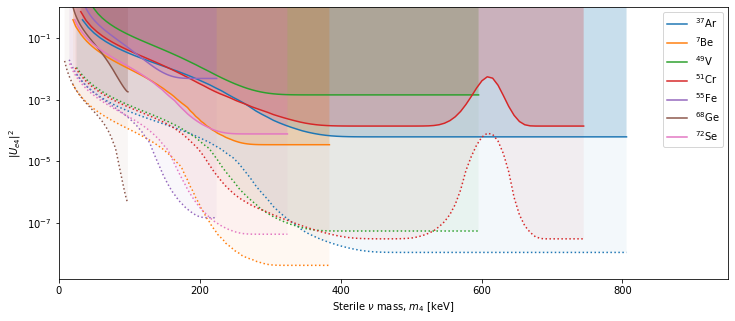

In [86]:


iso_list = ["ar_37", "be_7", "v_49", "cr_51", "fe_55", "ge_68", "se_72"]

fig=plt.figure()

for iso in iso_list:

    flist = glob.glob("/Users/dcmoore/grace/impulse/steriles/limits/%s*.npz"%iso)

    for i,f in enumerate(flist):

        cdat = np.load(f)
        lim_vals = cdat['lim']
        #lim_vals[-1]=1

        if(i==0):
            p=plt.semilogy( cdat['m'], lim_vals, ":" )
            c=p[0].get_color()
            plt.fill_between(cdat['m'], lim_vals, np.ones_like(lim_vals), edgecolor='none', facecolor=c, alpha=0.05)
        else:
            Z,A = iso.split('_')
            lab = "$^{%s}$%s"%( A, Z.capitalize() )
            plt.semilogy( cdat['m'], lim_vals,  '-', color=c, label=lab)
            plt.fill_between(cdat['m'], lim_vals, np.ones_like(lim_vals), edgecolor='none', facecolor=c, alpha=0.2)

plt.ylim([0,1])
plt.xlim([0,950])
plt.xlabel(r"Sterile $\nu$ mass, $m_4$ [keV]")
plt.ylabel("$|U_{e4}|^2$")
plt.legend()
fig.set_size_inches(12,5)
plt.show()
